In [27]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [28]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## Nordic Device-30 Own Models

## Nordic Device-30(i) dataset

In [3]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/Device-30(i)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[-0.0234375+0.0703125j  0.0625   -0.015625j  -0.0234375+0.0078125j ...
  0.0078125+0.015625j   0.015625 +0.03125j    0.0625   -0.0078125j]
2048
85185
(2048, 85185)
[0.02900163 0.01708401 0.00599894 ... 0.00538724 0.00599033 0.01664416]
0
(10000, 2048)
(10000,)
[ 0.0390625+0.0390625j -0.0546875-0.0078125j  0.03125  +0.0546875j ...
  0.       -0.015625j  -0.046875 -0.0078125j -0.015625 -0.0625j   ]
2048
80241
(2048, 80241)
[0.0295978  0.01722668 0.00870225 ... 0.00930543 0.00755128 0.01796037]
1
(20000, 2048)
(20000,)
[ 0.0546875-0.0234375j  0.03125  -0.046875j  -0.0234375-0.0234375j ...
  0.       -0.015625j   0.03125  -0.0390625j -0.0078125+0.j       ]
2048
71316
(2048, 71316)
[0.0293704  0.01623967 0.00537395 ... 0.00561898 0.00598221 0.01678048]
2
(30000, 2048)
(30000,)
[-0.015625 -0.0078125j -0.046875 -0.046875j  -0.03125  -0.015625j  ...
  0.0078125+0.0390625j -0.0390625-0.046875j   0.0234375+0.j       ]
2048
75268
(2048, 75268)
[0.02902174 0.01629172 0.00577534 ... 0.00521284 0.00

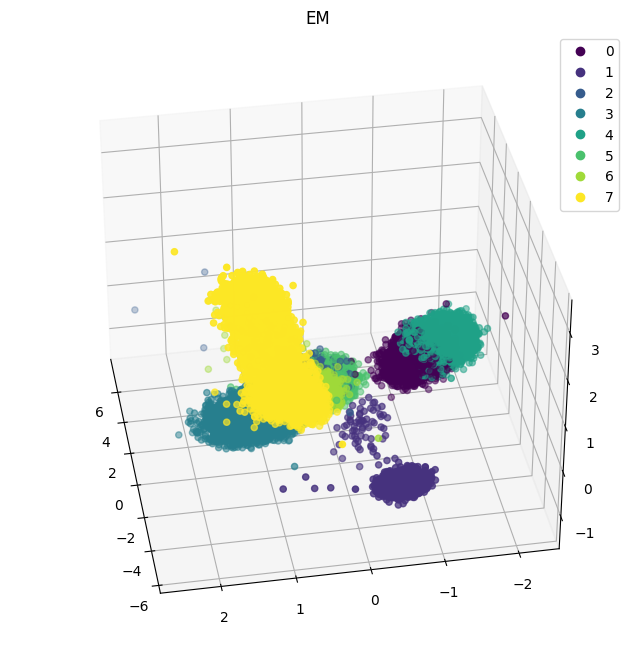

In [4]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/Nordic-30(i)_scatter.pdf')

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
Non-

2023-03-10 15:12:20.536510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/Nordic-30(i)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 22s 11ms/step - loss: 1.7498 - accuracy: 0.5857 - val_loss: 1.1173 - val_accuracy: 0.8935
Epoch 2/30
2025/2025 [==============================] - 21s 10ms/step - loss: 0.5904 - accuracy: 0.9532 - val_loss: 0.2833 - val_accuracy: 0.9894
Epoch 3/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.1600 - accuracy: 0.9950 - val_loss: 0.0838 - val_accuracy: 0.9978
Epoch 4/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.0540 - accuracy: 0.9984 - val_loss: 0.0373 - val_accuracy: 0.9985
Epoch 5/30
2025/2025 [==============================] - 17s 9ms/step - loss: 0.0276 - accuracy: 0.9988 - val_loss: 0.0230 - val_accuracy: 0.9987
Epoch 6/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.0180 - accuracy: 0.9990 - val_loss: 0.0167 - val_accuracy: 0.9990
Epoch 7/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.0133 - accuracy: 0.9992 - val_loss: 0.0131 - val_

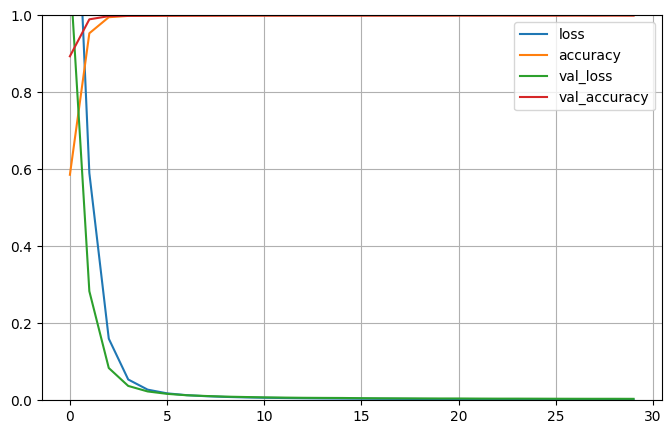

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [9]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/Nordic-30(i)_model.h5")

In [10]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0035 - accuracy: 0.9996
test loss, test acc: [0.0035013200249522924, 0.999625027179718]


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 5ms/step
[0 0 3 ... 6 4 6]
0
[[ 926    0    0    0    0    1    0    0]
 [   0  999    0    0    0    0    0    0]
 [   0    0  979    0    0    0    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   0    0    0    0    0 1015    1    0]
 [   0    0    1    0    0    0 1014    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.999625


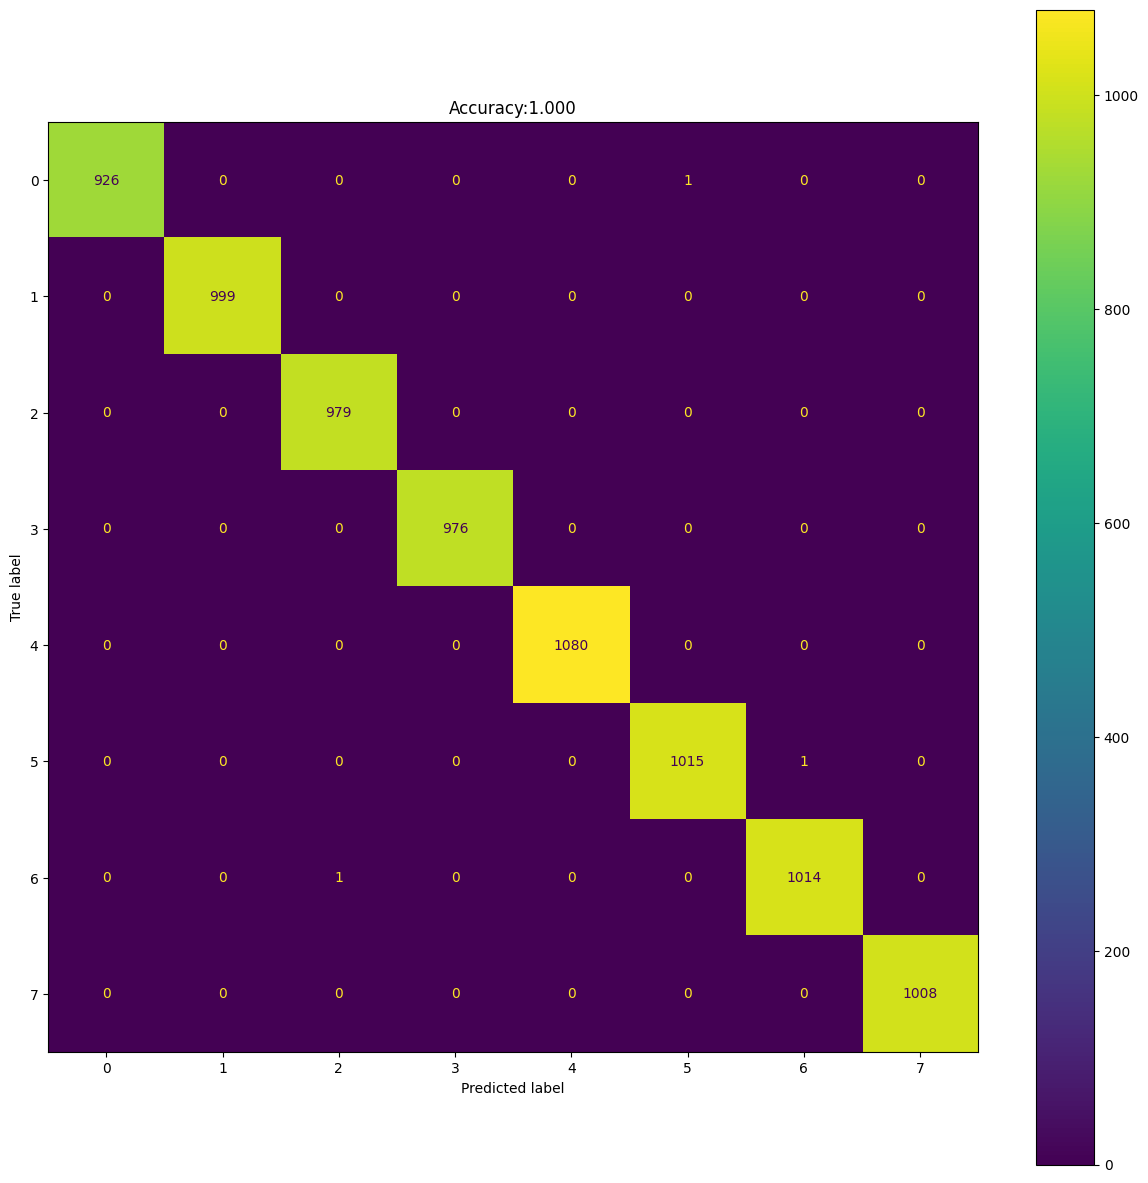

In [12]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/iNordic-30(i)_confusion_matrix.pdf')

## Nordic Device-30(ii) dataset

In [15]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/Device-30(ii)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[-0.09375  +0.09375j   -0.0546875-0.015625j   0.0078125+0.015625j  ...
  0.0390625-0.046875j   0.0078125-0.0078125j -0.0078125+0.03125j  ]
2048
82787
(2048, 82787)
[0.02935637 0.01689323 0.00528763 ... 0.00509753 0.00603779 0.0169532 ]
0
(10000, 2048)
(10000,)
[0.03125  -0.015625j  0.0546875-0.0546875j 0.0703125-0.0625j    ...
 0.0703125-0.0234375j 0.0078125+0.0078125j 0.09375  +0.j       ]
2048
81339
(2048, 81339)
[0.02924517 0.01813177 0.00796105 ... 0.00768866 0.00720287 0.01787682]
1
(20000, 2048)
(20000,)
[-0.0234375-0.1015625j  0.03125  -0.015625j   0.015625 +0.j        ...
  0.0546875-0.0234375j  0.0703125+0.0234375j -0.09375  -0.046875j ]
2048
84012
(2048, 84012)
[0.02862767 0.01639104 0.00558128 ... 0.00523017 0.00532019 0.01678962]
2
(30000, 2048)
(30000,)
[0.       -0.0234375j 0.0234375-0.015625j  0.0234375-0.0234375j ...
 0.1640625+0.1171875j 0.0625   +0.1875j    0.015625 +0.09375j  ]
2048
85799
(2048, 85799)
[0.0286698  0.01669605 0.00512103 ... 0.00549245 0.0053625  0.017

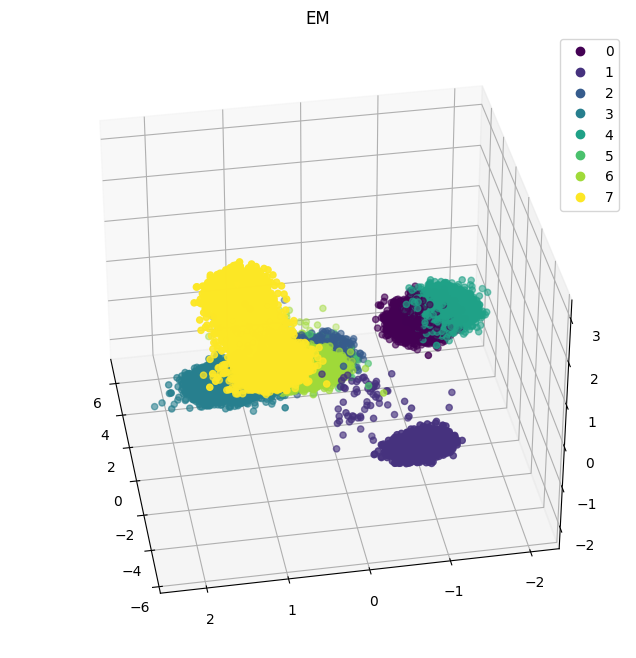

In [16]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/Nordic-30(ii)_scatter.pdf')

In [17]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/Nordic-30(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 22s 10ms/step - loss: 1.6712 - accuracy: 0.5369 - val_loss: 0.9923 - val_accuracy: 0.8065
Epoch 2/30
2025/2025 [==============================] - 21s 11ms/step - loss: 0.6221 - accuracy: 0.8750 - val_loss: 0.4036 - val_accuracy: 0.9386
Epoch 3/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.2859 - accuracy: 0.9562 - val_loss: 0.1861 - val_accuracy: 0.9789
Epoch 4/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.1311 - accuracy: 0.9859 - val_loss: 0.0875 - val_accuracy: 0.9922
Epoch 5/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0651 - accuracy: 0.9939 - val_loss: 0.0539 - val_accuracy: 0.9937
Epoch 6/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.0386 - accuracy: 0.9965 - val_loss: 0.0329 - val_accuracy: 0.9961
Epoch 7/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.0263 - accuracy: 0.9977 - val_loss: 0.0246 - val

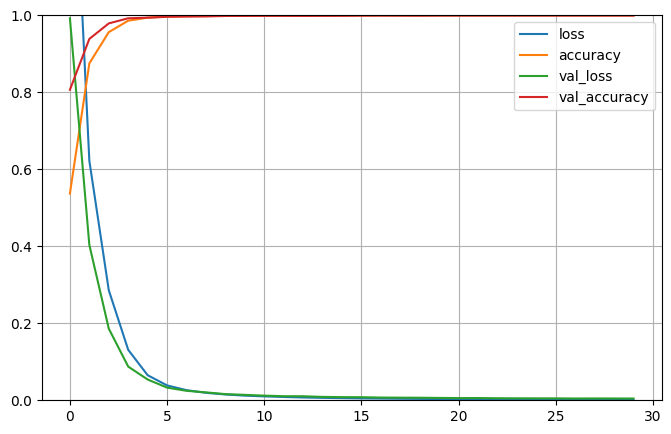

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/Nordic-30(ii)_model.h5")

In [22]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0038 - accuracy: 0.9996
test loss, test acc: [0.0037842458114027977, 0.999625027179718]


In [23]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 927    0    0    0    0    0    0    0]
 [   0  998    0    0    0    1    0    0]
 [   0    0  979    0    0    0    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   0    0    1    0    0 1015    0    0]
 [   0    0    0    0    0    1 1014    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.999625


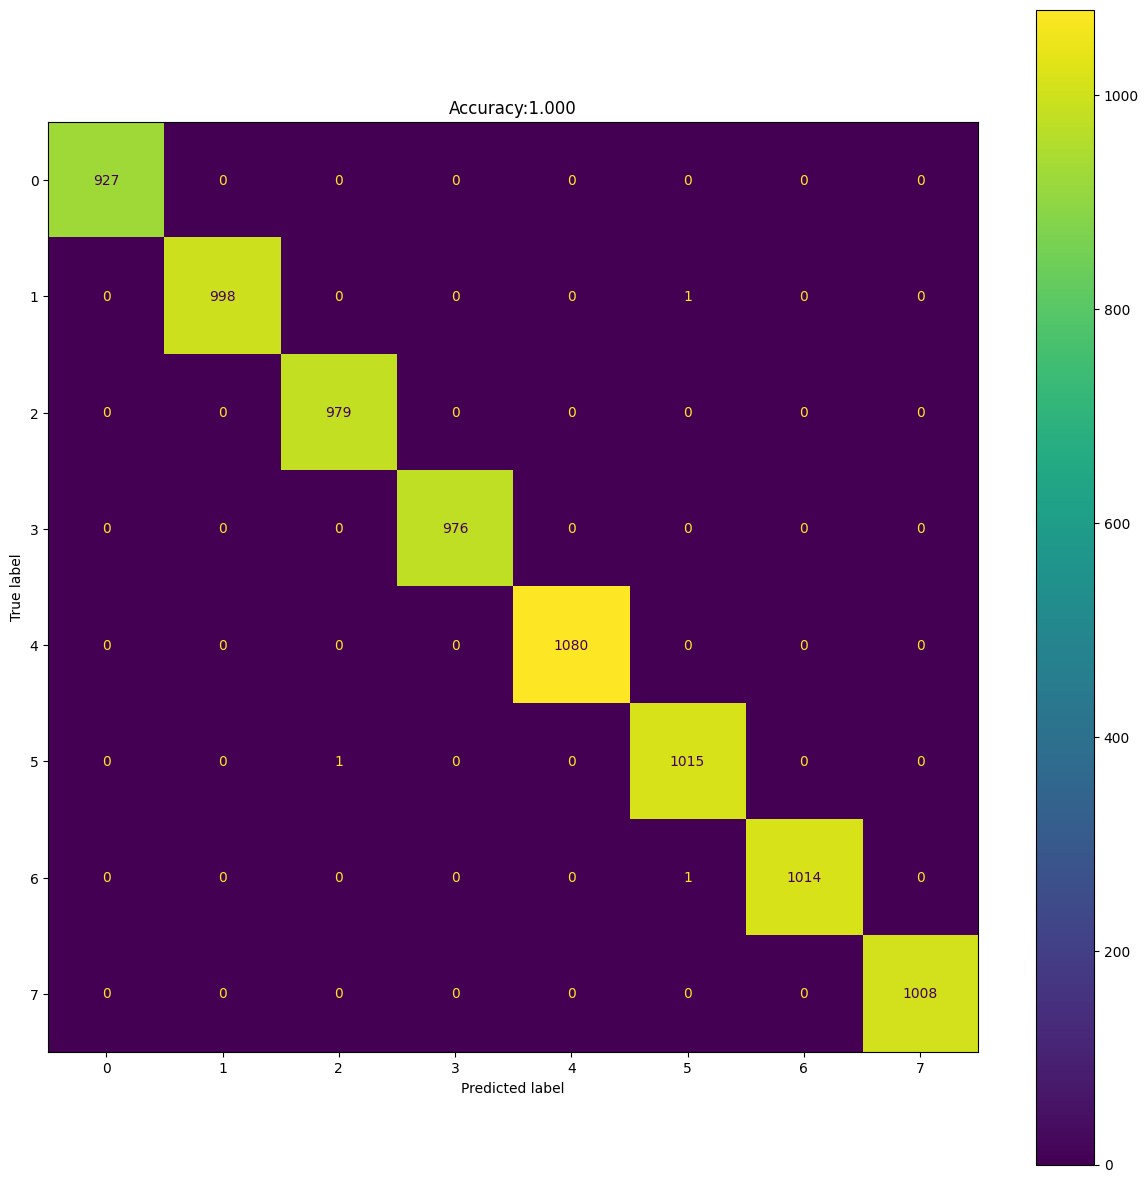

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-30/iNordic-30(ii)_confusion_matrix.pdf')

## Nordic Device-30(iii) dataset

In [3]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/32MHz/Device-30(iii)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[ 0.0859375-0.1015625j  0.140625 -0.0390625j  0.15625  +0.0234375j ...
  0.1484375-0.015625j   0.0078125+0.j        -0.046875 -0.0546875j]
2048
81192
(2048, 81192)
[0.02548666 0.01464884 0.00464241 ... 0.00497836 0.00486453 0.01513299]
0
(10000, 2048)
(10000,)
[ 0.015625 -0.0390625j -0.0078125+0.0234375j -0.0625   -0.046875j  ...
 -0.015625 -0.03125j   -0.03125  +0.0390625j  0.0234375-0.0390625j]
2048
94064
(2048, 94064)
[0.02545975 0.01511589 0.004805   ... 0.00455836 0.00458218 0.01531063]
1
(20000, 2048)
(20000,)
[-0.0546875-0.03125j    0.0234375+0.0078125j  0.0390625-0.0234375j ...
 -0.0078125+0.109375j   0.0625   -0.0234375j -0.0390625+0.015625j ]
2048
73803
(2048, 73803)
[0.0254731  0.01545307 0.00518516 ... 0.00449251 0.00567295 0.01493643]
2
(30000, 2048)
(30000,)
[ 0.03125  +0.0078125j  0.015625 +0.0078125j  0.0078125-0.0234375j ...
 -0.140625 +0.0859375j  0.0625   -0.0078125j -0.0390625-0.0234375j]
2048
88580
(2048, 88580)
[0.02542135 0.01478643 0.00474003 ... 0.00453174 0.00

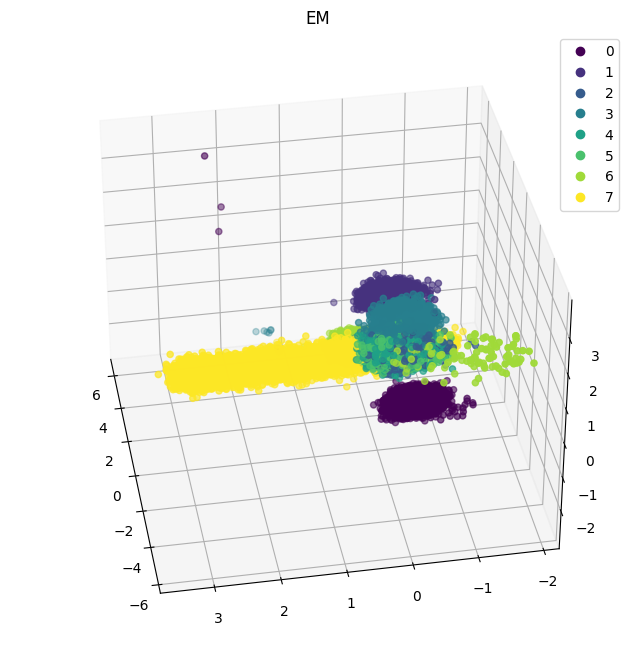

In [4]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iii)_scatter.pdf')

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
Non-

2023-04-09 19:02:17.495662: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 22s 11ms/step - loss: 1.8674 - accuracy: 0.4585 - val_loss: 1.4552 - val_accuracy: 0.8307
Epoch 2/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.8605 - accuracy: 0.8709 - val_loss: 0.4675 - val_accuracy: 0.9193
Epoch 3/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.3269 - accuracy: 0.9457 - val_loss: 0.2303 - val_accuracy: 0.9576
Epoch 4/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.1666 - accuracy: 0.9782 - val_loss: 0.1221 - val_accuracy: 0.9875
Epoch 5/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0895 - accuracy: 0.9900 - val_loss: 0.0707 - val_accuracy: 0.9911
Epoch 6/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.0541 - accuracy: 0.9938 - val_loss: 0.0488 - val_accuracy: 0.9936
Epoch 7/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0375 - accuracy: 0.9952 - val_loss: 0.0374 - val_

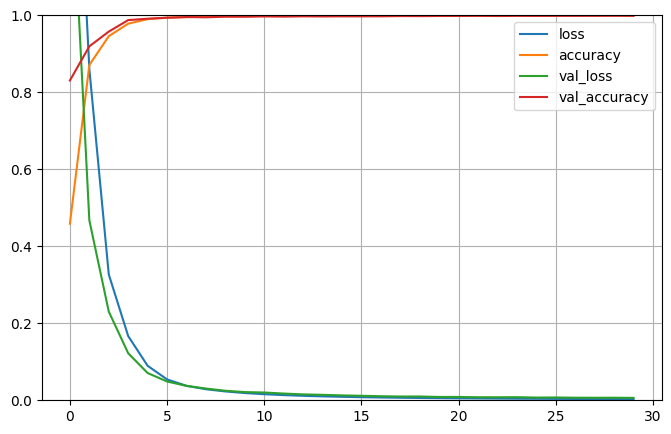

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [9]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iii)_model.h5")

In [10]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0075 - accuracy: 0.9984
test loss, test acc: [0.00752145005390048, 0.9983749985694885]


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 927    0    0    0    0    0    0    0]
 [   0  995    1    0    2    1    0    0]
 [   0    0  978    0    0    1    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   0    0    2    0    0 1014    0    0]
 [   0    0    0    0    0    2 1013    0]
 [   0    0    1    0    1    2    0 1004]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       0.99      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.998375


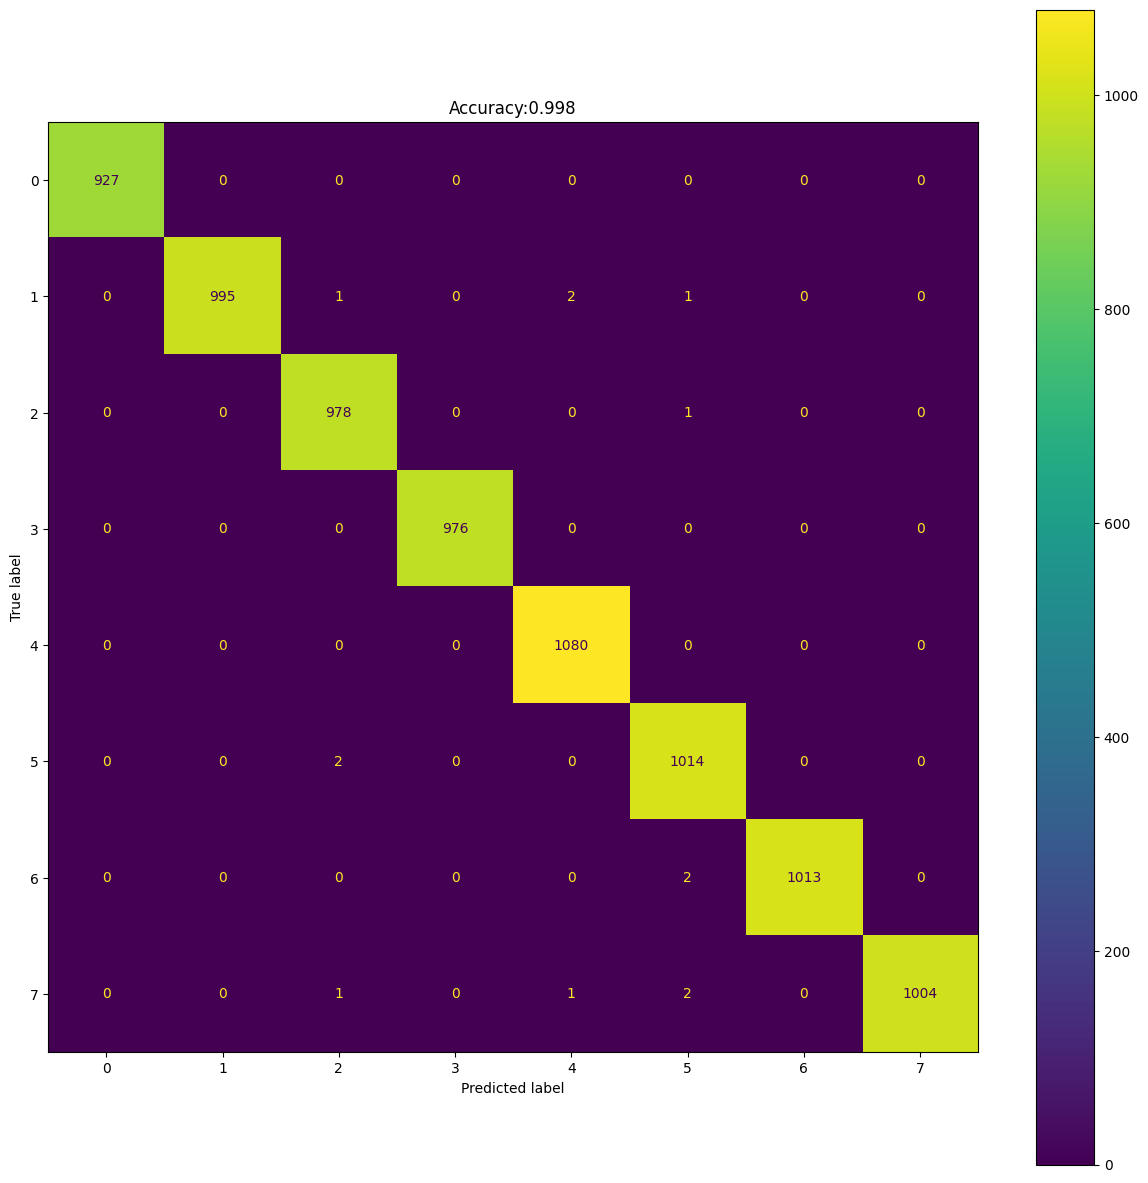

In [12]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/iNordic-30(iii)_confusion_matrix.pdf')

## Nordic Device-30(iv) dataset

In [15]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/32MHz/Device-30(iv)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[ 0.0234375-0.0546875j  0.015625 +0.0390625j -0.0078125+0.09375j   ...
  0.       +0.0390625j  0.0703125-0.1015625j  0.0390625-0.0078125j]
2048
79729
(2048, 79729)
[0.02592004 0.01550449 0.0057586  ... 0.00465551 0.0053518  0.01526976]
0
(10000, 2048)
(10000,)
[-0.0078125-0.03125j   -0.0703125+0.046875j   0.0859375-0.0546875j ...
 -0.015625 +0.j        -0.078125 -0.03125j   -0.015625 -0.0234375j]
2048
92308
(2048, 92308)
[0.0259731  0.01490589 0.0055895  ... 0.00483991 0.0046817  0.01494553]
1
(20000, 2048)
(20000,)
[ 0.0078125-0.1328125j  0.       -0.0234375j -0.03125  -0.0625j    ...
  0.0625   -0.0390625j  0.0234375+0.j         0.0703125-0.0078125j]
2048
83313
(2048, 83313)
[0.02563546 0.01518829 0.00539794 ... 0.00510627 0.00546732 0.01556452]
2
(30000, 2048)
(30000,)
[ 0.0234375+0.0703125j -0.0234375+0.0390625j  0.09375  +0.078125j  ...
  0.046875 -0.0234375j  0.015625 +0.109375j   0.0546875+0.j       ]
2048
79583
(2048, 79583)
[0.02566977 0.01504102 0.00494757 ... 0.00447381 0.00

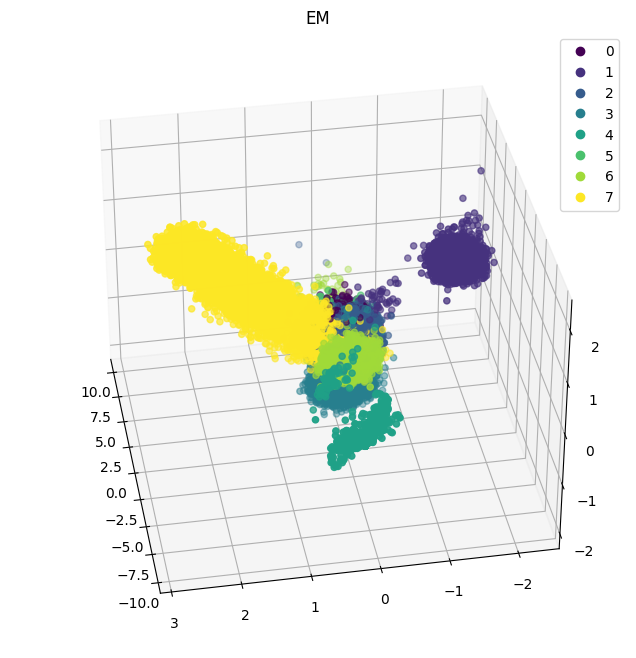

In [16]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iv)_scatter.pdf')

In [17]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iv)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 20s 10ms/step - loss: 1.7690 - accuracy: 0.5240 - val_loss: 1.3646 - val_accuracy: 0.8321
Epoch 2/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.9264 - accuracy: 0.8877 - val_loss: 0.5521 - val_accuracy: 0.9446
Epoch 3/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.3461 - accuracy: 0.9748 - val_loss: 0.1920 - val_accuracy: 0.9878
Epoch 4/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.1262 - accuracy: 0.9904 - val_loss: 0.0777 - val_accuracy: 0.9928
Epoch 5/30
2025/2025 [==============================] - 19s 10ms/step - loss: 0.0621 - accuracy: 0.9941 - val_loss: 0.0437 - val_accuracy: 0.9967
Epoch 6/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0399 - accuracy: 0.9960 - val_loss: 0.0312 - val_accuracy: 0.9974
Epoch 7/30
2025/2025 [==============================] - 19s 10ms/step - loss: 0.0292 - accuracy: 0.9971 - val_loss: 0.0226 - val

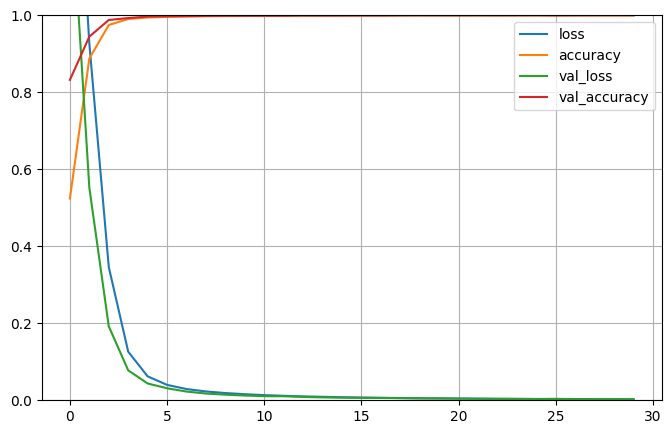

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(iv)_model.h5")

In [22]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0086 - accuracy: 0.9979
test loss, test acc: [0.008600631728768349, 0.9978749752044678]


In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 5ms/step
[0 0 3 ... 6 4 6]
0
[[ 924    0    1    0    0    2    0    0]
 [   0  999    0    0    0    0    0    0]
 [   0    0  978    0    0    1    0    0]
 [   0    0    0  974    0    2    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   2    0    0    0    0 1014    0    0]
 [   0    0    3    0    0    3 1009    0]
 [   0    0    0    0    0    3    0 1005]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       0.99      1.00      0.99      1016
           6       1.00      0.99      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.997875


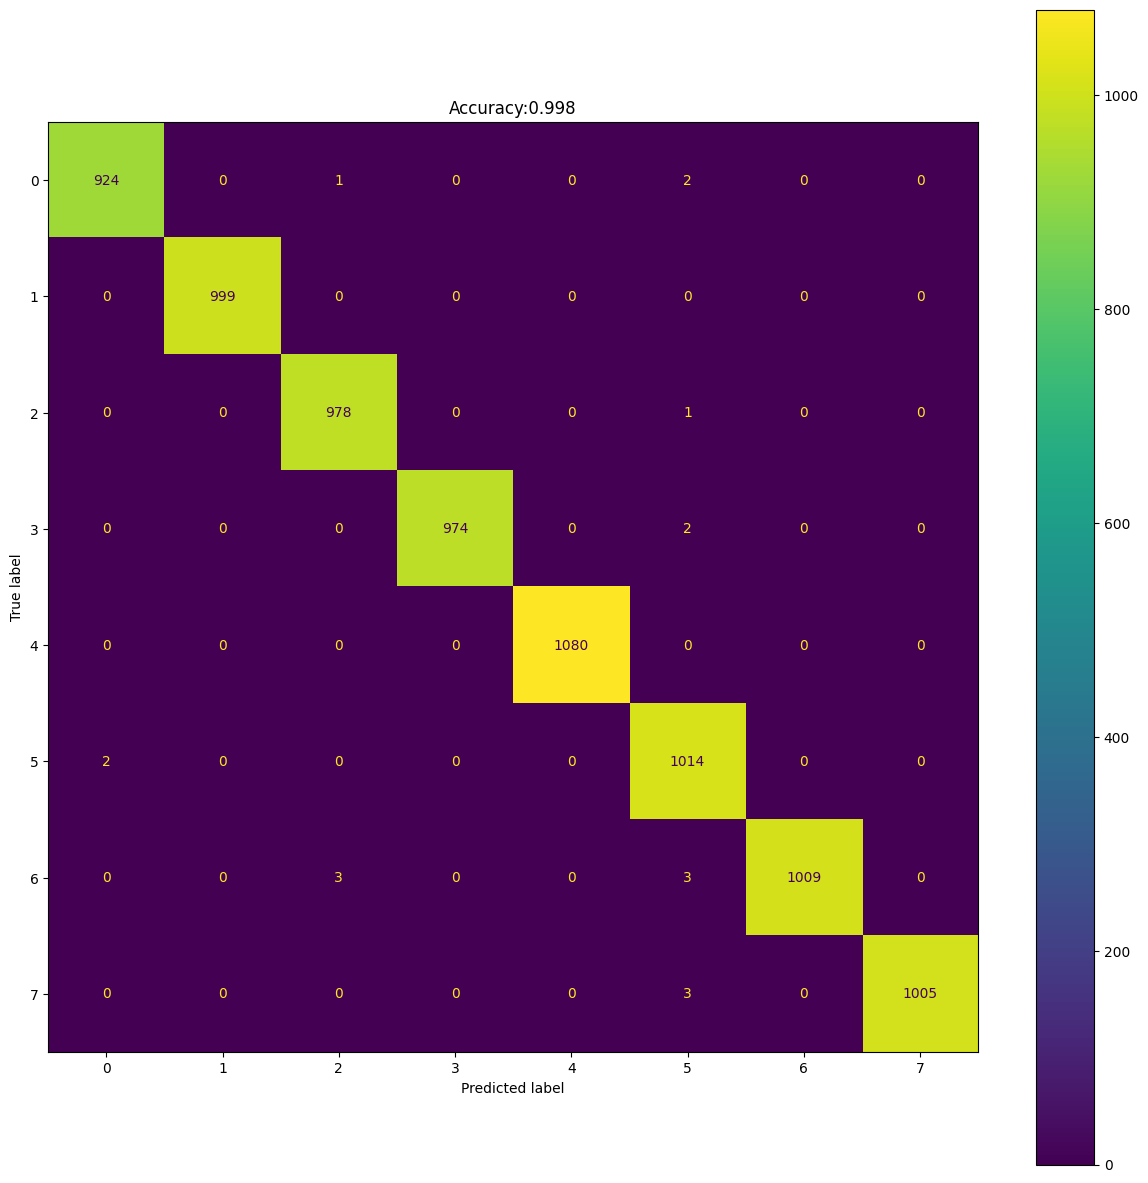

In [26]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/iNordic-30(iv)_confusion_matrix.pdf')

## Nordic Device-30(v) dataset

In [29]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/32MHz/Device-30(v)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[-0.03125  -0.0234375j  0.015625 +0.03125j   -0.0390625-0.015625j  ...
 -0.03125  +0.0234375j  0.       +0.j         0.0625   -0.046875j ]
2048
89163
(2048, 89163)
[0.0253294  0.01470364 0.00518536 ... 0.00484284 0.00545344 0.01458634]
0
(10000, 2048)
(10000,)
[-0.015625 +0.03125j    0.09375  -0.0859375j  0.0234375-0.03125j   ...
  0.0234375-0.015625j  -0.109375 +0.046875j   0.0546875+0.0390625j]
2048
85433
(2048, 85433)
[0.02533321 0.01499843 0.00478145 ... 0.00478914 0.00509663 0.01503052]
1
(20000, 2048)
(20000,)
[ 0.015625 +0.0078125j -0.0390625-0.046875j   0.015625 -0.0390625j ...
  0.0078125-0.015625j   0.1015625+0.0234375j  0.0390625-0.0390625j]
2048
80934
(2048, 80934)
[0.02558209 0.01493408 0.00488566 ... 0.00522487 0.00519829 0.01512941]
2
(30000, 2048)
(30000,)
[-0.015625 +0.046875j  -0.03125  -0.1328125j  0.0078125-0.0546875j ...
 -0.015625 +0.j         0.0078125+0.0625j     0.0390625-0.015625j ]
2048
80095
(2048, 80095)
[0.02515224 0.01473609 0.00532296 ... 0.00485402 0.00

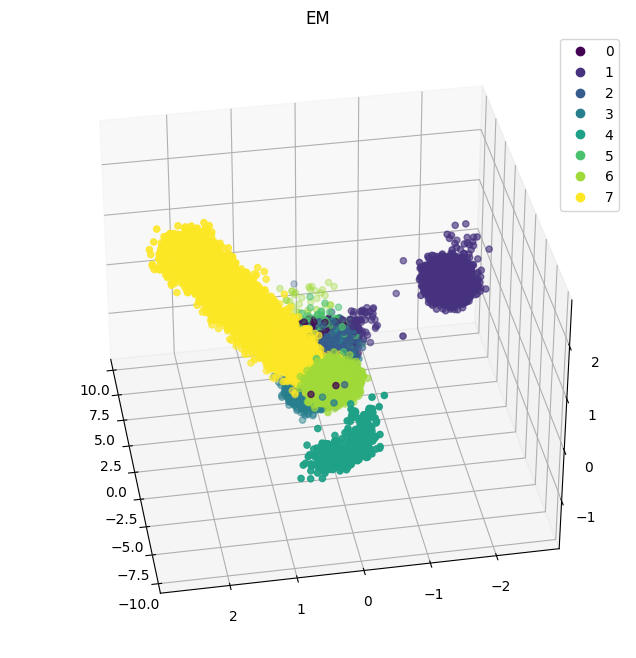

In [30]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(v)_scatter.pdf')

In [31]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [33]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(v)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 20s 10ms/step - loss: 1.8192 - accuracy: 0.4969 - val_loss: 1.4199 - val_accuracy: 0.8206
Epoch 2/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.9130 - accuracy: 0.8963 - val_loss: 0.5535 - val_accuracy: 0.9337
Epoch 3/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.3551 - accuracy: 0.9681 - val_loss: 0.2140 - val_accuracy: 0.9789
Epoch 4/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.1342 - accuracy: 0.9890 - val_loss: 0.0917 - val_accuracy: 0.9935
Epoch 5/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0625 - accuracy: 0.9943 - val_loss: 0.0479 - val_accuracy: 0.9960
Epoch 6/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0374 - accuracy: 0.9963 - val_loss: 0.0325 - val_accuracy: 0.9971
Epoch 7/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0259 - accuracy: 0.9973 - val_loss: 0.0251 - val_

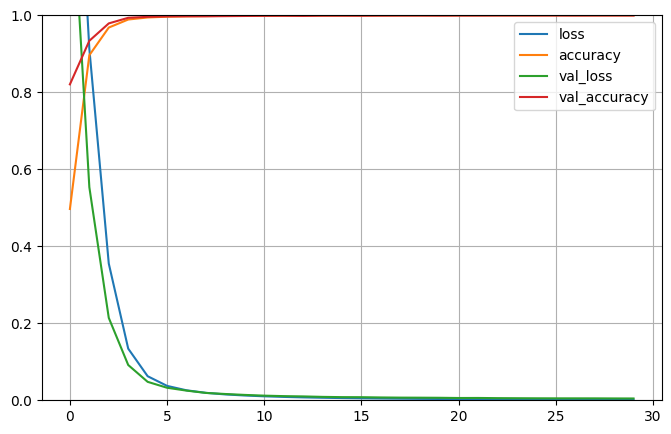

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [35]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/Nordic-30(v)_model.h5")

In [36]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0038 - accuracy: 0.9996
test loss, test acc: [0.003799374448135495, 0.999625027179718]


In [37]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 927    0    0    0    0    0    0    0]
 [   1  998    0    0    0    0    0    0]
 [   0    0  979    0    0    0    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   0    0    0    0    0 1016    0    0]
 [   1    0    1    0    0    0 1013    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.999625


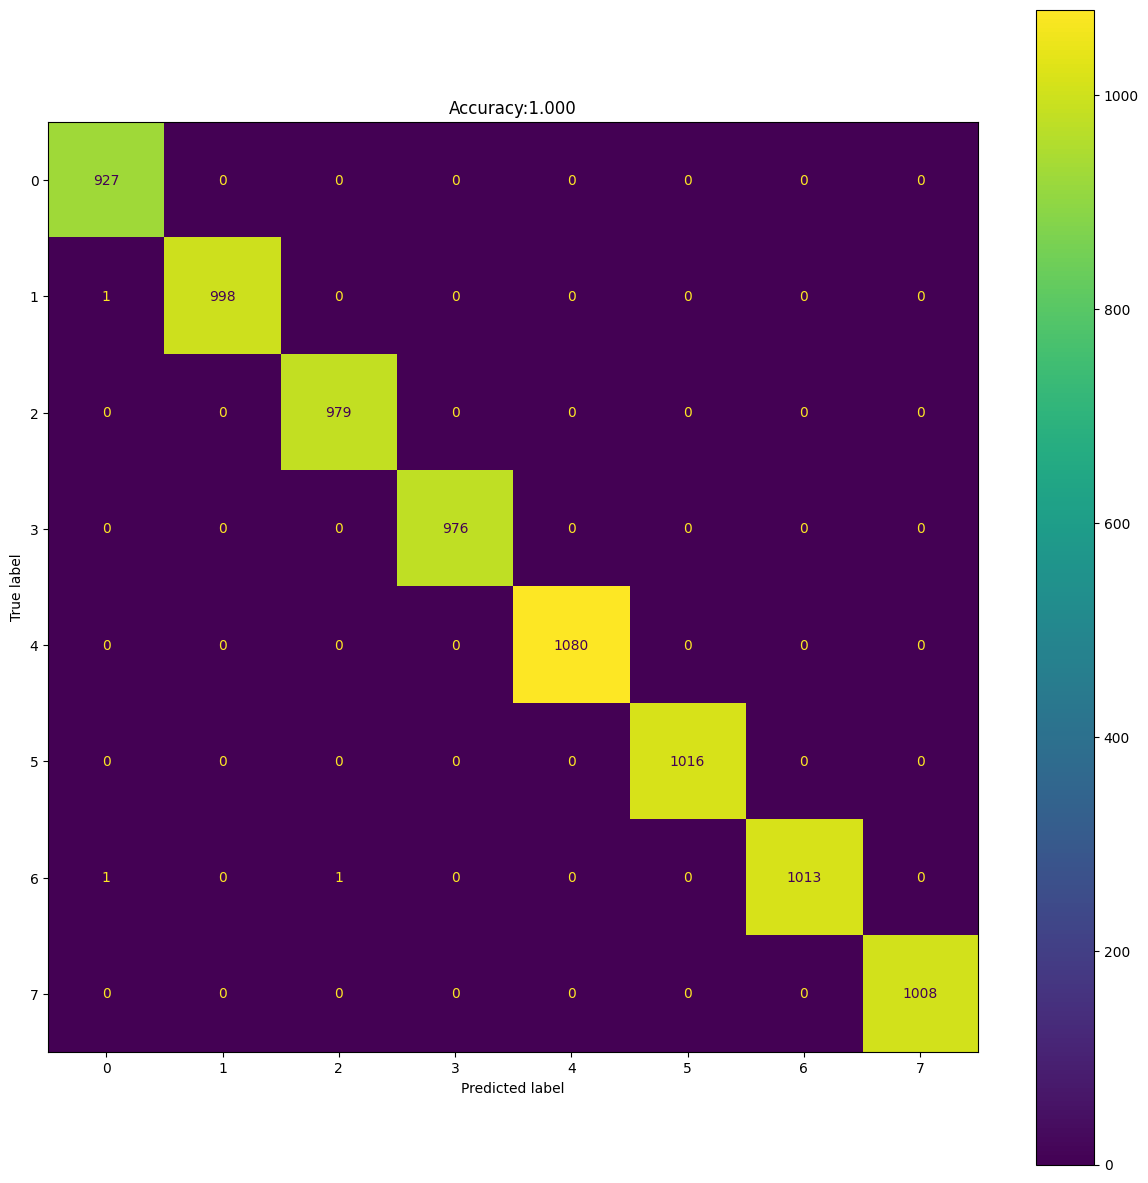

In [38]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-30/Nordic-device-30-Own_models/iNordic-30(v)_confusion_matrix.pdf')